<a href="https://colab.research.google.com/github/A-76/ML-Projects/blob/main/PracticeDataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Possible Questions to answer**


1.   Do certain times of the day have more vendors working? Are the prices more during these hours?
2.   



In [98]:
taxi_df = pd.read_csv("Taxi Datset.csv",nrows=20000)
taxi_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [99]:
taxi_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [100]:
categorical_cols = ['VendorID','PULocationID','DOLocationID', 'payment_type','passenger_count','store_and_fwd_flag','RatecodeID']
for col in categorical_cols:
  taxi_df[col] = pd.Categorical(taxi_df[col])

**Questions that arise**

1.   Why is the minimum distance and fare negative? is that a bias that needs to be added to all values?
2.   Is it possible to have 0 passengers in a trip? Is it delivery? or a mistake? Which driver makes this mistake? Is it repetitive?



In [101]:
taxi_df.describe()

,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2.795555,12.711536,1.201785,0.493400,2.116065,0.122216,0.297705,18.508920,2.266000
std,2.799995,9.875298,1.138784,0.070226,2.546214,0.929765,0.036115,11.529956,0.753921
min,0.000000,-70.000000,-0.500000,-0.500000,-0.800000,0.000000,-0.300000,-70.300000,-2.500000
25%,1.100000,6.500000,0.500000,0.500000,0.000000,0.000000,0.300000,11.760000,2.500000
50%,1.910000,10.000000,0.500000,0.500000,1.960000,0.000000,0.300000,15.800000,2.500000
75%,3.510000,16.000000,3.000000,0.500000,3.060000,0.000000,0.300000,22.300000,2.500000
max,39.630000,300.000000,3.500000,0.500000,100.000000,20.000000,0.300000,360.360000,2.500000


In [102]:
#converting dates from type string to datetime
# we can segment time to different categories - morning, afternoon,evening,night and conduct analysis for each separetely.
# We can also segment into weeks or months and plot the prices to check for seasonality or other patterns.

taxi_df["updated_pickup_date"] = pd.to_datetime(taxi_df['tpep_pickup_datetime'],format='mixed',dayfirst=True)
taxi_df["updated_dropoff_date"] = pd.to_datetime(taxi_df['tpep_dropoff_datetime'],format='mixed',dayfirst=True)


In [103]:
#obtain the duration of the trip.
taxi_df['duration'] = taxi_df["updated_dropoff_date"] - taxi_df["updated_pickup_date"]
'''
morning - 5 am - 12pm
afternoon - 12pm - 5pm
evening - 5pm - 9pm
night - 9 pm - 5 am
'''
# Define bins and labels for time of day
bins = [-1, 5, 12, 17, 21, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening', 'Night']

# Create a new column 'time_of_day' based on the hour of the timestamp
taxi_df['time_of_day'] = pd.cut(taxi_df['updated_pickup_date'].dt.hour,
                           bins=bins,
                           labels=labels,
                           right=False,ordered=False)


In [104]:
taxi_df = taxi_df.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime'])


**Findings**


1.   Tip amount negatively correlates with payment type
2.   VendorID negatively correlates with extra charges? Which means the lower ID vendors are charging a higher "extra charge" why? Are they located in certain areas? what is special about this case?



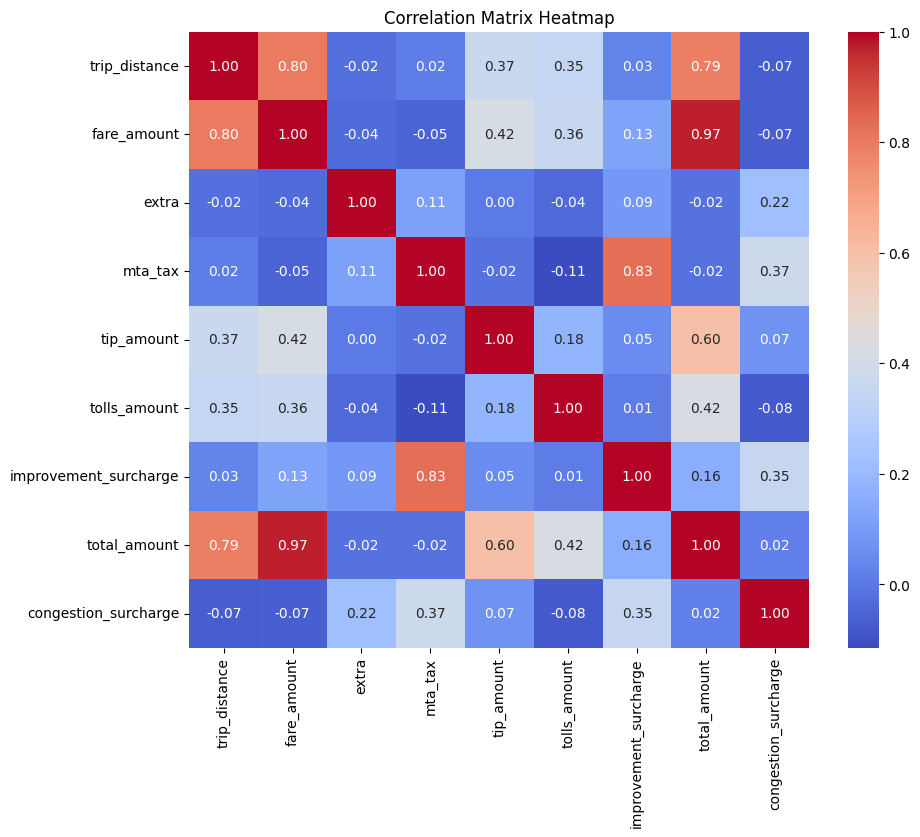

In [105]:
correlation_matrix = taxi_df.corr(numeric_only = True)

plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Plot heatmap with annotations and color map
plt.title('Correlation Matrix Heatmap')  # Set the title
plt.show()  # Show the plot

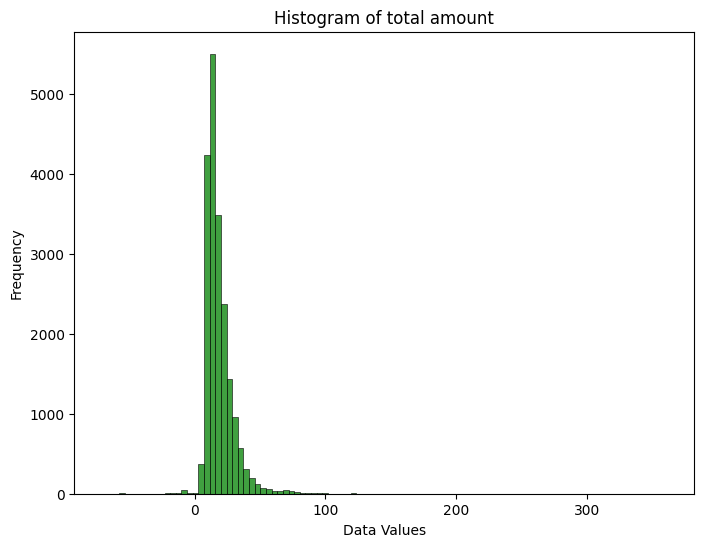

In [106]:

# Plot histogram
#hist columns - trip_distance, total_amount, tip_amount,congestion_surcharge,
plt.figure(figsize=(8, 6))  # Set the figure size
sns.histplot(data=taxi_df, x='total_amount', bins=100, color='green')  # Plot histogram with 20 bins and kernel density estimation
plt.title('Histogram of total amount')  # Set the title
plt.xlabel('Data Values')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.show()  # Show the plot


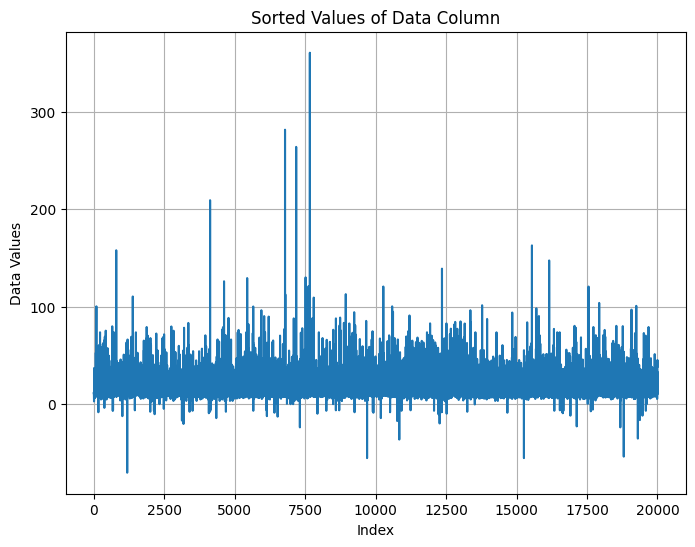

In [107]:
import numpy as np
sorted_values = taxi_df['total_amount']

# Create a range of values
x_values = np.arange(len(sorted_values))

# Plot sorted values against the range
plt.figure(figsize=(8, 6))  # Set the figure size
plt.plot(x_values,sorted_values)
#sns.scatterplot(data=taxi_df, x=taxi_df.index, y='total_amount', color='blue', alpha=0.5)

plt.title('Sorted Values of Data Column')  # Set the title
plt.xlabel('Index')  # Set the x-axis label
plt.ylabel('Data Values')  # Set the y-axis label
plt.grid(True)  # Show grid
plt.show()  # Show the plot

The negative values seem legitimate with the negative sign being a mistake. option -1 drop the rows, option 2 take absolute value for the columns.

In [108]:
#use z-score or IQR for removing outliers.
threshold = 0  # Set your threshold value here
filtered_df = taxi_df[taxi_df['total_amount'] < threshold]
filtered_df.shape
filtered_df.head()


,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,updated_pickup_date,updated_dropoff_date,duration,time_of_day
161,2.0,1.0,0.60,1.0,N,170,137,3.0,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-8.3,-2.5,2020-01-01 00:54:28,2020-01-01 00:58:41,0 days 00:04:13,Night
374,2.0,1.0,0.11,1.0,N,260,260,3.0,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,0.0,2020-01-01 00:57:13,2020-01-01 00:58:05,0 days 00:00:52,Night
671,2.0,3.0,0.18,1.0,N,141,141,3.0,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-6.8,-2.5,2020-01-01 00:36:31,2020-01-01 00:37:23,0 days 00:00:52,Night
681,2.0,2.0,0.09,1.0,N,114,114,3.0,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-6.3,-2.5,2020-01-01 00:23:15,2020-01-01 00:23:54,0 days 00:00:39,Night
1012,2.0,2.0,1.26,1.0,N,249,68,4.0,-8.5,-0.5,-0.5,0.0,0.0,-0.3,-12.3,-2.5,2020-01-01 00:13:39,2020-01-01 00:24:26,0 days 00:10:47,Night


In [109]:
for col in taxi_df.columns:
  if pd.api.types.is_numeric_dtype(taxi_df[col]):
      taxi_df[col] = taxi_df[col].abs()

In [110]:
taxi_df.describe()

,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,updated_pickup_date,updated_dropoff_date,duration
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000,20000,20000
mean,2.795555,12.779536,1.205035,0.496750,2.116145,0.122216,0.299775,18.600920,2.281250,2020-01-01 05:51:43.665400064,2020-01-01 07:42:57.879349760,0 days 01:51:14.213950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019-12-18 15:27:49,2019-12-18 15:28:59,0 days 00:00:00
25%,1.100000,7.000000,0.500000,0.500000,0.000000,0.000000,0.300000,11.760000,2.500000,2020-01-01 00:26:54,2020-01-01 00:40:21.750000128,0 days 00:06:50
50%,1.910000,10.000000,0.500000,0.500000,1.960000,0.000000,0.300000,15.800000,2.500000,2020-01-01 00:47:09,2020-01-01 01:01:37.500000,0 days 00:11:54
75%,3.510000,16.000000,3.000000,0.500000,3.060000,0.000000,0.300000,22.300000,2.500000,2020-01-01 01:15:55.500000,2020-01-01 01:30:50,0 days 00:19:14
max,39.630000,300.000000,3.500000,0.500000,100.000000,20.000000,0.300000,360.360000,2.500000,2020-12-07 23:55:27,2020-12-07 23:56:07,30 days 23:59:00
std,2.799995,9.787136,1.135344,0.040181,2.546148,0.929765,0.008213,11.380932,0.706434,NaN,NaN,1 days 10:26:56.010574047


In [111]:
#now for categorical data
taxi_df.RatecodeID.unique()

[1.0, 5.0, 3.0, 2.0, 4.0, 99.0, NaN]
Categories (6, float64): [1.0, 2.0, 3.0, 4.0, 5.0, 99.0]

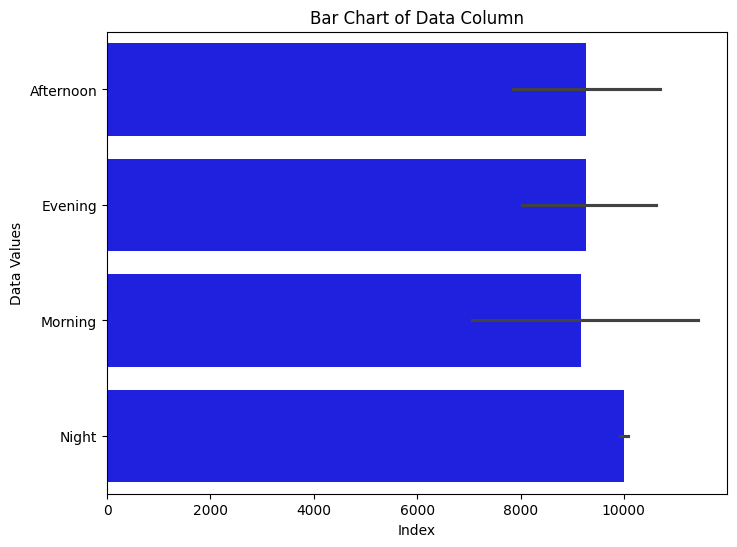

In [112]:
plt.figure(figsize=(8, 6))  # Set the figure size
sns.barplot(data=taxi_df, x=taxi_df.index, y=taxi_df.time_of_day, color='blue')  # Plot bar chart
plt.title('Bar Chart of Data Column')  # Set the title
plt.xlabel('Index')  # Set the x-axis label
plt.ylabel('Data Values')  # Set the y-axis label
plt.show()  # Sh

In [113]:
#remove duplicate entries
print(taxi_df.shape)
duplicate_rows = taxi_df.duplicated()

# Print duplicate rows
#print("Duplicate rows:")
#print(taxi_df[duplicate_rows])

# You can also count the number of duplicates
print("Number of duplicates:", duplicate_rows.sum())
taxi_df[duplicate_rows]

#duplicate_indices = taxi_df[taxi_df.duplicated(keep=False)].index
taxi_df = taxi_df.drop_duplicates()
print(taxi_df.shape)
#print(taxi_df.iloc[duplicate_indices[1]])

(20000, 20)
Number of duplicates: 7
(19993, 20)


**Dealing with missing values**

In [114]:
rows_with_nan = taxi_df[taxi_df.isna().any(axis=1)]
taxi_df = taxi_df.dropna()

**Checking for outliers based on duration.**

In [115]:
#checking outliers based on minutes
taxi_df['duration_minutes'] = taxi_df['duration'].dt.total_seconds() / 60

In [116]:
taxi_df.describe()

,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,updated_pickup_date,updated_dropoff_date,duration,duration_minutes
count,19988.000000,19988.000000,19988.000000,19988.000000,19988.000000,19988.000000,19988.000000,19988.000000,19988.000000,19988,19988,19988,19988.000000
mean,2.795994,12.777247,1.205608,0.496748,2.116651,0.121984,0.299775,18.599425,2.281619,2020-01-01 05:16:39.716680192,2020-01-01 07:07:57.579647744,0 days 01:51:17.862967780,111.297716
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019-12-18 15:27:49,2019-12-18 15:28:59,0 days 00:00:00,0.000000
25%,1.100000,7.000000,0.500000,0.500000,0.000000,0.000000,0.300000,11.760000,2.500000,2020-01-01 00:26:53.750000128,2020-01-01 00:40:20.750000128,0 days 00:06:50,6.833333
50%,1.910000,10.000000,0.500000,0.500000,1.960000,0.000000,0.300000,15.800000,2.500000,2020-01-01 00:47:08.500000,2020-01-01 01:01:37.500000,0 days 00:11:54,11.900000
75%,3.512500,16.000000,3.000000,0.500000,3.060000,0.000000,0.300000,22.300000,2.500000,2020-01-01 01:15:55,2020-01-01 01:30:50,0 days 00:19:14,19.233333
max,39.630000,300.000000,3.500000,0.500000,100.000000,20.000000,0.300000,360.360000,2.500000,2020-12-07 23:55:27,2020-12-07 23:56:07,30 days 23:59:00,44639.000000
std,2.800383,9.783742,1.135427,0.040193,2.546542,0.929072,0.008215,11.379390,0.705895,NaN,NaN,1 days 10:27:33.143985454,2067.552400


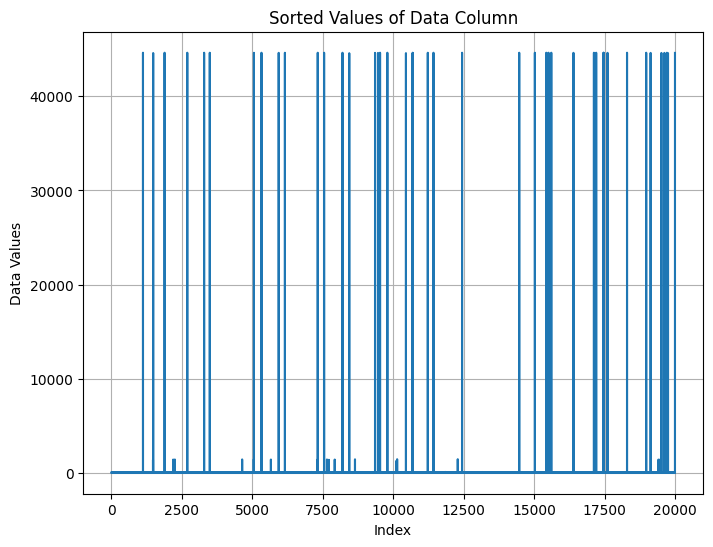

In [117]:
sorted_values = taxi_df['duration_minutes']

# Create a range of values
x_values = np.arange(len(sorted_values))

# Plot sorted values against the range
plt.figure(figsize=(8, 6))  # Set the figure size
plt.plot(x_values,sorted_values)
#sns.scatterplot(data=taxi_df, x=taxi_df.index, y='total_amount', color='blue', alpha=0.5)

plt.title('Sorted Values of Data Column')  # Set the title
plt.xlabel('Index')  # Set the x-axis label
plt.ylabel('Data Values')  # Set the y-axis label
plt.grid(True)  # Show grid
plt.show()  # Show the plot

In [118]:
#remove values based on IQR
Q1 = taxi_df['duration_minutes'].quantile(0.25)
Q3 = taxi_df['duration_minutes'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
taxi_df = taxi_df[(taxi_df['duration_minutes'] >= lower_bound) & (taxi_df['duration_minutes'] <= upper_bound)]
#print(df_filtered.shape,taxi_df.shape)

In [119]:
#now to remove outliers using Zscore (remove values greater than 4 std away from the mean 4)
from scipy import stats
taxi_df['total_amount_zscore'] = stats.zscore(taxi_df['total_amount'])
filtered_df_new = taxi_df[(taxi_df['total_amount_zscore'] > 4) | (taxi_df['total_amount_zscore'] < -3)]

#filtered_df_new

taxi_df = taxi_df[(taxi_df['total_amount_zscore'] < 4) & (taxi_df['total_amount_zscore'] > -3)]

<ipython-input-119-73996429f9c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_df['total_amount_zscore'] = stats.zscore(taxi_df['total_amount'])


In [120]:
#statistical tests
#chi square (time of day and pick up or drop off location)
#anova (time of day and total amount)
#t test (generate confidence interval on total amount or tip amount)
#two sample hypothesis test

In [121]:
taxi_df['total_amount'].mean()

17.436937305699484

Assuming the population mean is 18 and seeing if there is any statistically significant difference when a sample of 1000 fares is taken.

In [122]:
#Peforming a 1 sample t-test and z-test for "total_amount"
import scipy.stats as stats

t_statistic, p_value = stats.ttest_1samp(a=taxi_df['total_amount'][:1000], popmean=17)
print(t_statistic , p_value)




0.28530609512699223 0.775468783182687


Seeing if there is any statistically significant difference between the average (total cab fare) during the morning and night

In [123]:
#performing a 2 sample t-test
data_group1 = taxi_df[taxi_df["time_of_day"]=='Night']['total_amount'][:1000]
data_group2 = taxi_df[taxi_df["time_of_day"]=='Morning']['total_amount'][:1000]
t_statistic, p_value = stats.ttest_ind(a=data_group1, b=data_group2)
print(t_statistic , p_value)

0.7603705078886605 0.44720904063248046


Conduct a hypothesis test between VendorID and time of day. do vendors have a particular preference?

**Need to ensure that each value in the expected frequencies array returned by the function is greater than 5. else test is invalid**

In [125]:
#performing a chi-square test
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(taxi_df['time_of_day'], taxi_df['VendorID'])

print("Contingency Table:")
print(contingency_table)
a = chi2_contingency(contingency_table.values)
print(a)

Contingency Table:
VendorID      1.0    2.0
time_of_day             
Afternoon      14     28
Evening         3     11
Morning        13      8
Night        6070  13153
Chi2ContingencyResult(statistic=9.654664821292082, pvalue=0.021741653687363176, dof=3, expected_freq=array([[1.32746114e+01, 2.87253886e+01],
       [4.42487047e+00, 9.57512953e+00],
       [6.63730570e+00, 1.43626943e+01],
       [6.07566321e+03, 1.31473368e+04]]))


In [126]:
#Use 1-way ANOVA between time_of_day and total_amount
from scipy.stats import f_oneway

g1 = taxi_df[taxi_df['time_of_day']=="Morning"]['total_amount'][:1000]
g2 = taxi_df[taxi_df['time_of_day']=="Afternoon"]['total_amount'][:1000]
g3 = taxi_df[taxi_df['time_of_day']=="Evening"]['total_amount'][:1000]
g4 = taxi_df[taxi_df['time_of_day']=="Night"]['total_amount'][:1000]

print(len(g1),len(g2),len(g3),len(g4))
f_statistic,p_value = f_oneway(g1,g2,g3,g4)
print(f_statistic,p_value)


21 42 14 1000
11.80565051130629 1.3033571778319609e-07


In [127]:
taxi_df.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'updated_pickup_date', 'updated_dropoff_date', 'duration',
       'time_of_day', 'duration_minutes', 'total_amount_zscore'],
      dtype='object')

**Data Transformations and Feature Selection**

In [128]:
#for col in taxi_df.columns:
#  print(f"{col} : {len(taxi_df[col].unique())}")
#  print()
print(taxi_df['store_and_fwd_flag'].unique())
#print(taxi_df['congestion_surcharge'].unique())

print(len(taxi_df[taxi_df['improvement_surcharge']==0.3]),len(taxi_df[taxi_df['improvement_surcharge']==0]))

['N', 'Y']
Categories (2, object): ['N', 'Y']
19288 12


In [129]:
cols_to_drop = ['total_amount_zscore','improvement_surcharge','duration','updated_pickup_date', 'updated_dropoff_date']
taxi_df = taxi_df.drop(columns = cols_to_drop)

In [130]:
taxi_df.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'total_amount', 'congestion_surcharge', 'time_of_day',
       'duration_minutes'],
      dtype='object')

In [131]:
!pip3 install category_encoders


In [132]:
#onehot encoding here
import category_encoders as ce

be_cols = ['VendorID','store_and_fwd_flag', 'PULocationID', 'DOLocationID']
ohe_cols = ['RatecodeID','payment_type','time_of_day']


taxi_df = pd.get_dummies(taxi_df,columns=ohe_cols,prefix=ohe_cols ,drop_first=True)

# Concatenate the one-hot encoded columns with the original DataFrame
#taxi_df = pd.concat([taxi_df, one_hot_encoded], axis=1)


In [133]:
#for col in be_cols:
encoder = ce.BinaryEncoder(verbose=1,cols=be_cols)
taxi_df_encoded = encoder.fit_transform(taxi_df)

prefix = 'Binary_'
new_cols = []
for col in taxi_df_encoded.columns:
  if(col in be_cols):
    new_cols.append(prefix+col)
  else:
    new_cols.append(col)

taxi_df_encoded.columns = new_cols


taxi_df_encoded

,VendorID_0,VendorID_1,passenger_count,trip_distance,store_and_fwd_flag_0,store_and_fwd_flag_1,PULocationID_0,PULocationID_1,PULocationID_2,PULocationID_3,...,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,RatecodeID_99.0,payment_type_2.0,payment_type_3.0,payment_type_4.0,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,0,1,1.0,1.20,0,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
1,0,1,1.0,1.20,0,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
2,0,1,1.0,0.60,0,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
3,0,1,1.0,0.80,0,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
4,1,0,1.0,0.00,0,1,0,0,0,0,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,1,0,1.0,1.16,0,1,0,1,0,0,...,False,False,False,False,True,False,False,False,False,True
19995,1,0,1.0,0.38,0,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,True
19996,1,0,1.0,5.78,0,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
19997,1,0,1.0,6.00,0,1,0,0,0,1,...,False,False,False,False,False,False,False,False,False,True


In [134]:
taxi_df_encoded.columns

Index(['VendorID_0', 'VendorID_1', 'passenger_count', 'trip_distance',
       'store_and_fwd_flag_0', 'store_and_fwd_flag_1', 'PULocationID_0',
       'PULocationID_1', 'PULocationID_2', 'PULocationID_3', 'PULocationID_4',
       'PULocationID_5', 'PULocationID_6', 'PULocationID_7', 'DOLocationID_0',
       'DOLocationID_1', 'DOLocationID_2', 'DOLocationID_3', 'DOLocationID_4',
       'DOLocationID_5', 'DOLocationID_6', 'DOLocationID_7', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount',
       'congestion_surcharge', 'duration_minutes', 'RatecodeID_2.0',
       'RatecodeID_3.0', 'RatecodeID_4.0', 'RatecodeID_5.0', 'RatecodeID_99.0',
       'payment_type_2.0', 'payment_type_3.0', 'payment_type_4.0',
       'time_of_day_Evening', 'time_of_day_Morning', 'time_of_day_Night'],
      dtype='object')

**Normalize or Standardize the numeric Data**

In [135]:
cols_to_scale = ['trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount','total_amount','congestion_surcharge','duration_minutes']
for col in cols_to_scale:
  taxi_df_encoded[f"{col}_scaled"] = (taxi_df_encoded[col] - taxi_df_encoded[col].mean())/taxi_df_encoded[col].std()

  #taxi_df_encoded[f"{col}_scaled"] = (taxi_df_encoded[col] - taxi_df_encoded[col].min())/(taxi_df_encoded[col].max()-taxi_df_encoded[col].min())

In [136]:
taxi_df_encoded = taxi_df_encoded.drop(columns=cols_to_scale)

In [137]:
taxi_df_encoded.describe()

,VendorID_0,VendorID_1,store_and_fwd_flag_0,store_and_fwd_flag_1,PULocationID_0,PULocationID_1,PULocationID_2,PULocationID_3,PULocationID_4,PULocationID_5,...,DOLocationID_7,trip_distance_scaled,fare_amount_scaled,extra_scaled,mta_tax_scaled,tip_amount_scaled,tolls_amount_scaled,total_amount_scaled,congestion_surcharge_scaled,duration_minutes_scaled
count,19300.000000,19300.000000,19300.000000,19300.000000,19300.000000,19300.000000,19300.000000,19300.000000,19300.000000,19300.000000,...,19300.000000,1.930000e+04,1.930000e+04,1.930000e+04,1.930000e+04,1.930000e+04,1.930000e+04,1.930000e+04,1.930000e+04,1.930000e+04
mean,0.683938,0.316062,0.011140,0.988860,0.005078,0.065751,0.347358,0.438187,0.421192,0.477306,...,0.450415,-1.693522e-17,-1.763471e-16,9.498447e-17,-8.968301e-16,-5.301459e-17,-3.018886e-17,-2.138991e-16,-1.148649e-16,6.479561e-17
std,0.464950,0.464950,0.104959,0.104959,0.071079,0.247853,0.476143,0.496177,0.493763,0.499498,...,0.497548,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.145357e+00,-1.690638e+00,-1.069194e+00,-1.657408e+01,-9.766872e-01,-1.092015e-01,-2.157416e+00,-3.302373e+00,-1.606636e+00
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-6.694179e-01,-7.576193e-01,-6.290631e-01,6.033206e-02,-9.766872e-01,-1.092015e-01,-7.023892e-01,3.027969e-01,-7.940954e-01
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-3.091273e-01,-2.552247e-01,-6.290631e-01,6.033206e-02,-1.443856e-02,-1.092015e-01,-2.582100e-01,3.027969e-01,-2.059126e-01
75%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,3.447332e-01,4.624819e-01,1.571591e+00,6.033206e-02,4.961424e-01,-1.092015e-01,4.841506e-01,3.027969e-01,6.167346e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,8.551351e+00,6.491217e+00,2.011721e+00,6.033206e-02,1.375161e+01,1.554265e+01,5.055855e+00,3.027969e-01,2.981593e+00


In [138]:
X = taxi_df_encoded.drop(columns = ['total_amount_scaled','fare_amount_scaled'])
y = taxi_df_encoded['total_amount_scaled']

**Feature Selection**

In [147]:
from xgboost import XGBRegressor

model = XGBRegressor()
#X =
# fit the model
model.fit(X.values, y.values)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print(f'{X.columns[i]}, Score: {v}')



VendorID_0, Score: 0.0008675633580423892
VendorID_1, Score: 0.0
passenger_count, Score: 0.001976838568225503
store_and_fwd_flag_0, Score: 0.0018156432779505849
store_and_fwd_flag_1, Score: 0.0
PULocationID_0, Score: 0.0006845237803645432
PULocationID_1, Score: 0.00212116283364594
PULocationID_2, Score: 0.0022684484720230103
PULocationID_3, Score: 0.002503736410290003
PULocationID_4, Score: 0.003179152961820364
PULocationID_5, Score: 0.0019348359201103449
PULocationID_6, Score: 0.0013080998323857784
PULocationID_7, Score: 0.002346483524888754
DOLocationID_0, Score: 0.0008322791545651853
DOLocationID_1, Score: 0.00263228639960289
DOLocationID_2, Score: 0.005256621632725
DOLocationID_3, Score: 0.0027665894012898207
DOLocationID_4, Score: 0.0012956128921359777
DOLocationID_5, Score: 0.002226361772045493
DOLocationID_6, Score: 0.0010167984291911125
DOLocationID_7, Score: 0.0020615486428141594
RatecodeID_2.0, Score: 0.2525164783000946
RatecodeID_3.0, Score: 0.008179440163075924
RatecodeID_4.

In [148]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# fit the model
model.fit(X.values, y.values)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print(f'{X.columns[i]}, Score: {v}')

VendorID_0, Score: 0.0002507082278344468
VendorID_1, Score: 0.0002427992725950588
passenger_count, Score: 0.0012629253698224886
store_and_fwd_flag_0, Score: 0.0002437605266756903
store_and_fwd_flag_1, Score: 0.0001673118912330707
PULocationID_0, Score: 1.5854044710704632e-05
PULocationID_1, Score: 0.00046789412646492924
PULocationID_2, Score: 0.0004589048507231233
PULocationID_3, Score: 0.0004178869744840225
PULocationID_4, Score: 0.0006682771773666374
PULocationID_5, Score: 0.00030162448033273323
PULocationID_6, Score: 0.00031625930712084145
PULocationID_7, Score: 0.00029297320499605624
DOLocationID_0, Score: 0.0002207148046801004
DOLocationID_1, Score: 0.00030802873827051586
DOLocationID_2, Score: 0.0007460069940022005
DOLocationID_3, Score: 0.0003932907223523504
DOLocationID_4, Score: 0.0002809489083581828
DOLocationID_5, Score: 0.00025128933246189403
DOLocationID_6, Score: 0.00034965342773755144
DOLocationID_7, Score: 0.0004541730301441414
RatecodeID_2.0, Score: 0.01915968900147675

In [154]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.datasets import make_regression


# Select the k best features using SelectKBest with f_regression
k = 15  # Number of best features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

print(f"Selected {k} best features:")
print(selected_features)


Selected 15 best features:
Index(['PULocationID_7', 'DOLocationID_0', 'DOLocationID_1', 'DOLocationID_2',
       'DOLocationID_4', 'RatecodeID_2.0', 'RatecodeID_4.0', 'RatecodeID_5.0',
       'payment_type_2.0', 'trip_distance_scaled', 'mta_tax_scaled',
       'tip_amount_scaled', 'tolls_amount_scaled',
       'congestion_surcharge_scaled', 'duration_minutes_scaled'],
      dtype='object')


In [182]:
X.columns

Index(['VendorID_0', 'VendorID_1', 'passenger_count', 'store_and_fwd_flag_0',
       'store_and_fwd_flag_1', 'PULocationID_0', 'PULocationID_1',
       'PULocationID_2', 'PULocationID_3', 'PULocationID_4', 'PULocationID_5',
       'PULocationID_6', 'PULocationID_7', 'DOLocationID_0', 'DOLocationID_1',
       'DOLocationID_2', 'DOLocationID_3', 'DOLocationID_4', 'DOLocationID_5',
       'DOLocationID_6', 'DOLocationID_7', 'RatecodeID_2.0', 'RatecodeID_3.0',
       'RatecodeID_4.0', 'RatecodeID_5.0', 'RatecodeID_99.0',
       'payment_type_2.0', 'payment_type_3.0', 'payment_type_4.0',
       'time_of_day_Evening', 'time_of_day_Morning', 'time_of_day_Night',
       'trip_distance_scaled', 'extra_scaled', 'mta_tax_scaled',
       'tip_amount_scaled', 'tolls_amount_scaled',
       'congestion_surcharge_scaled', 'duration_minutes_scaled'],
      dtype='object')

In [187]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
#model = LinearRegression()
model = RandomForestRegressor(n_estimators=100, random_state=42)
#model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42,enable_categorical=True)
#model = Lasso(alpha = 0.01)
#model = Ridge(alpha=0.1)



model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rs = r2_score(y_test, y_pred)
print("r2 score:", rs)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Print the coefficients and intercept
#print("Coefficients:", model.coef_)
#print("Intercept:", model.intercept_)


Mean Squared Error: 0.02489573225283786
r2 score: 0.9762788364295635
RMSE: 0.1577838149267467
